In [20]:
test = "hello world"
print(test)

hello world


In [5]:
import pandas as pd 
import numpy as np
import csv as csv
import seaborn as sns
import matplotlib.pyplot as plt

## Loading and Cleaning data

In [ ]:
#loading in data
unhcrFull = pd.read_csv("")
unhcrFull

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/hdx_refugees_pse_unhcr.csv'

In [3]:
##cleaning data 

#taking out first row 
unhcrClean = unhcrFull

unhcrClean.drop([0], inplace = True)

#converting population into a integer 

unhcrClean['population'] = unhcrClean['population'].astype(int)

##getting only year
unhcrClean['reference_period_end'] = pd.to_datetime(unhcrClean['reference_period_end'])
unhcrClean['year'] = unhcrClean['reference_period_end'].dt.year

##pulling columns of interest 
unhcrClean = unhcrClean[['asylum_location_code', 'population_group', 'gender', 'age_range', 'population', 'year']]
unhcrClean
#citations
#https://stackoverflow.com/questions/30405413/pandas-extract-year-from-datetime-dfyear-dfdate-year-is-not-working
#google ai: 'convert column to datetime' 


,asylum_location_code,population_group,gender,age_range,population,year
1,ALB,REF,f,0-4,0,2020
2,ALB,REF,f,5-11,0,2020
3,ALB,REF,f,12-17,5,2020
4,ALB,REF,f,18-59,0,2020
5,ALB,REF,f,60+,0,2020
...,...,...,...,...,...,...
29662,YEM,REF,m,12-17,85,2004
29663,YEM,REF,m,18-59,76,2004
29664,YEM,REF,m,60+,0,2004
29665,YEM,REF,m,all,305,2004


In [4]:
#making sure integer works
unhcrClean['population']

1          0
2          0
3          5
4          0
5          0
        ... 
29662     85
29663     76
29664      0
29665    305
29666    440
Name: population, Length: 29666, dtype: int64

## Overview of refugees

### By population type and gender 

In [5]:
## hcrAge_Gender = df with all age groups & split by sex 

hcrAge_Gender = unhcrClean.loc[(unhcrClean["age_range"] == "all") & (unhcrClean["gender"] != "all")]
hcrAge_Gender

#Citations
#https://www.statology.org/pandas-select-rows-based-on-column-values/

,asylum_location_code,population_group,gender,age_range,population,year
6,ALB,REF,f,all,5,2020
12,ALB,REF,m,all,0,2020
19,ARE,OOC,f,all,7,2020
25,ARE,OOC,m,all,7,2020
32,ARE,REF,f,all,5,2020
...,...,...,...,...,...,...
29639,USA,REF,m,all,0,2004
29646,YEM,ASY,f,all,74,2004
29652,YEM,ASY,m,all,75,2004
29659,YEM,REF,f,all,135,2004


In [6]:
# hcrAll_byRefType = df sum population of refugees over all years  split by gender, population group
hcrAll_GroupAge = hcrAge_Gender[['population', 'population_group', 'gender']].groupby(['population_group', 'gender'])['population'].sum().to_frame().reset_index()
hcrAll_GroupAge

,population_group,gender,population
0,ASY,f,24080
1,ASY,m,49713
2,OOC,f,28453
3,OOC,m,23972
4,REF,f,837319
5,REF,m,1007463


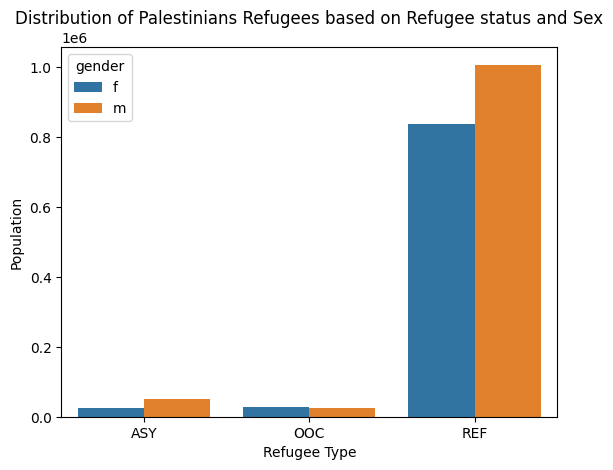

In [7]:
#plotting a barplot to see distribution of refugees split by gender and population group
hcrAll_GroupAge_bar = sns.barplot(hcrAll_GroupAge, x = "population_group", y = "population", hue ='gender')
plt.xlabel('Refugee Type')
plt.ylabel('Population')
plt.title('Distribution of Palestinians Refugees based on Refugee status and Sex')
plt.show()


#citations
#https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot

### Top countries in 2023

In [8]:
#new df with top countries in 2023

#creating hcr23 to specify only data from 2023
hcrAll = unhcrClean.loc[(unhcrClean["age_range"] == "all") & (unhcrClean["gender"] == "all")]
hcr23 = hcrAll.loc[(hcrAll['year'] == 2023)]

#summing together population type to get top 10 countries
hcr23_top10 = hcr23[['population', 'year', 'asylum_location_code']].groupby('asylum_location_code')['population'].sum().to_frame().reset_index().sort_values(by = ['population'], ascending=False).head(10)
hcr23_top10


,asylum_location_code,population
25,GRC,15265
5,BEL,10333
31,IRQ,6726
15,DEU,3991
14,CYP,2657
37,LBN,2399
21,FRA,2326
66,SWE,1507
18,ESP,1494
22,GBR,1203


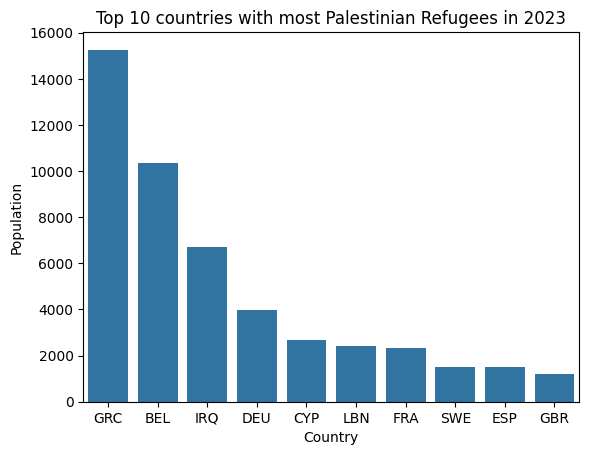

In [9]:
#bar graph with countries for 2023 

hcr23Top10_bar = sns.barplot(hcr23_top10, x = 'asylum_location_code', y = 'population')
plt.xlabel('Country')
plt.ylabel('Population')
plt.title('Top 10 countries with most Palestinian Refugees in 2023')
plt.show(hcr23Top10_bar)

#Greece had the most palestinian refugees 

### Top 5 countries, 2001-2023 

In [10]:
### top countries of all time (find total pop)

#hcrAll = age range and gender are not split 
hcrAll = unhcrClean.loc[(unhcrClean["age_range"] == "all") & (unhcrClean["gender"] == "all")]
hcrAll 



,asylum_location_code,population_group,gender,age_range,population,year
13,ALB,REF,all,all,5,2020
26,ARE,OOC,all,all,14,2020
39,ARE,REF,all,all,15,2020
52,ARG,ASY,all,all,10,2020
65,ARG,REF,all,all,19,2020
...,...,...,...,...,...,...
29614,UKR,REF,all,all,5,2004
29627,USA,ASY,all,all,15,2004
29640,USA,REF,all,all,5,2004
29653,YEM,ASY,all,all,149,2004


In [11]:

#finding top 10 countries 
hcrAll_CountrySum = hcrAll[['population', 'asylum_location_code']].groupby('asylum_location_code').sum().reset_index().sort_values(by = ['population'], ascending = False).head(5)
hcrAll_CountrySum


,asylum_location_code,population
84,SAU,1921146
27,EGY,1472164
42,IRQ,437738
54,LBY,110807
25,DZA,74142


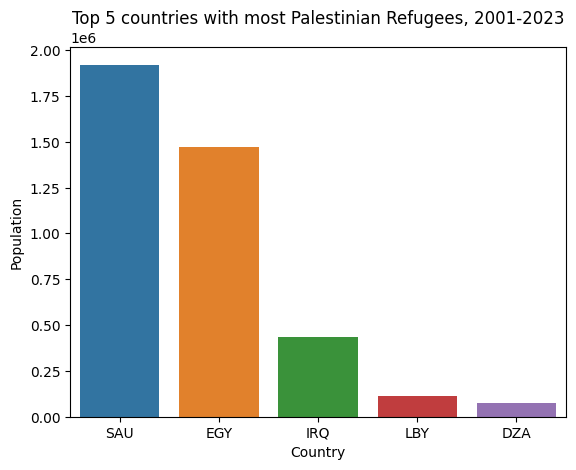

In [12]:
#table showing top countries of all time + number of refugees 
hcrAll_CountrySum_bar = sns.barplot(hcrAll_CountrySum, x = 'asylum_location_code', y = 'population', hue = 'asylum_location_code')
plt.xlabel('Country')
plt.ylabel('Population')
plt.title('Top 5 countries with most Palestinian Refugees, 2001-2023')
plt.show()

## Change over time 

In [13]:
#total amount of palestinian refugees by year
hcrYearCountry = hcrAll[['population', 'year', 'asylum_location_code']].groupby(['year', 'asylum_location_code'])['population'].sum().to_frame().reset_index()
hcrYearCountry

#hcrAll['population']

,year,asylum_location_code,population
0,2001,ARE,62
1,2001,AUS,159
2,2001,AZE,12
3,2001,BEL,27
4,2001,BIH,5
...,...,...,...
1484,2023,USA,125
1485,2023,VEN,7
1486,2023,YEM,701
1487,2023,ZAF,35


### split by population group

In [14]:
#df with year to year total number of forcibly displaced palestinians - by population group
hcrYearGroupSum = hcrAll[['population', 'year', 'population_group']].groupby(['year', 'population_group'])['population'].sum().to_frame().reset_index()
hcrYearGroupSum

,year,population_group,population
0,2001,ASY,889
1,2001,OOC,6000
2,2001,REF,349158
3,2002,ASY,999
4,2002,OOC,6000
...,...,...,...
58,2022,OOC,2556
59,2022,REF,104307
60,2023,ASY,12387
61,2023,OOC,2866


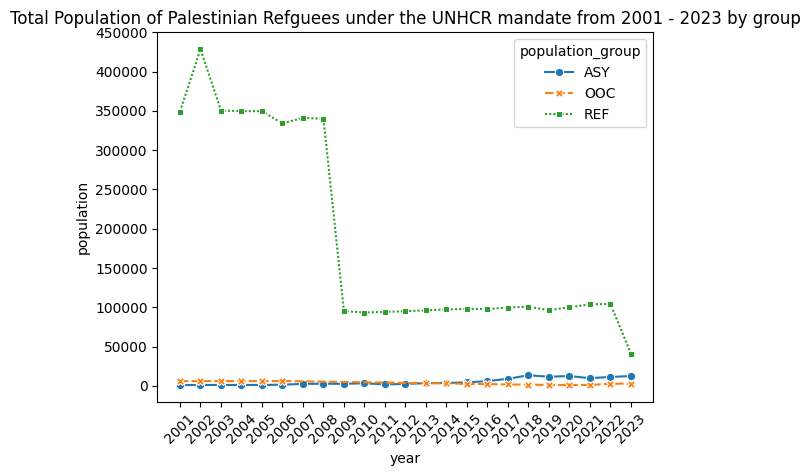

In [15]:
hcrYearGroup_line = sns.lineplot(data = hcrYearGroupSum,
                            x = 'year', y = 'population', hue = 'population_group', style = 'population_group',
                            markers=True)
sns.set_style('darkgrid')
plt.xticks([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,2020, 2021, 2022, 2023])
plt.xticks(rotation = 45)
plt.yticks([0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000])
plt.title('Total Population of Palestinian Refguees under the UNHCR mandate from 2001 - 2023 by group')
plt.show()
#https://seaborn.pydata.org/generated/seaborn.lineplot.html 

### by Year

In [16]:
#total refugees by year
hcrYearSum = hcrAll[['population', 'year']].groupby('year').sum().reset_index()
hcrYearSum

,year,population
0,2001,356047
1,2002,435774
2,2003,357636
3,2004,356851
4,2005,356716
5,2006,341513
6,2007,343647
7,2008,342652
8,2009,97673
9,2010,96506


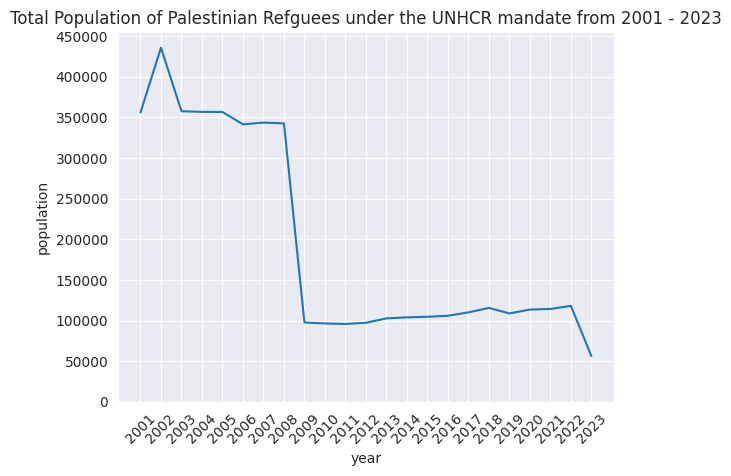

In [17]:
#total population of palestinian refugees 
hcrYear_line = sns.lineplot(data = hcrYearSum,
                            x = 'year', y = 'population',
                            markers='o')
sns.set_style('darkgrid')
plt.xticks([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,2020, 2021, 2022, 2023])
plt.xticks(rotation = 45)
plt.yticks([0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000])
plt.title('Total Population of Palestinian Refguees under the UNHCR mandate from 2001 - 2023')
plt.show()

### top 10 countries all time

In [18]:
#line plot for change in refugee population by the top 5 countries

#year to year total number of refugees per year split by country
hcrYearCountry = hcrAll[['population', 'year', 'asylum_location_code']].groupby(['year', 'asylum_location_code'])['population'].sum().to_frame().reset_index()

#pulling out only the top 10 countries taken from earlier bar graph
hcrYearCountry_top5 = hcrYearCountry[hcrYearCountry['asylum_location_code'].isin(['SAU', 'EGY', 'IRQ', 'LBY', 'DZA'])]
hcrYearCountry_top5
#hcr23 = hcrAll.loc[(hcrAll['year'] == 2023)]

#citations
#https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html 


,year,asylum_location_code,population
14,2001,DZA,4005
16,2001,EGY,139
22,2001,IRQ,90000
26,2001,LBY,8584
36,2001,SAU,240000
...,...,...,...
1393,2022,SAU,41
1427,2023,DZA,195
1442,2023,IRQ,6726
1449,2023,LBY,857


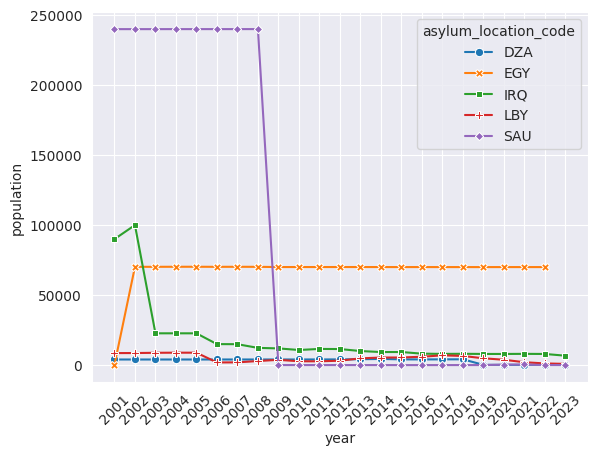

In [19]:
hcrYearCountry_top5_line = sns.lineplot(data=hcrYearCountry_top5, x = 'year', y = 'population', hue = 'asylum_location_code' , style = 'asylum_location_code', markers=True, dashes=False)
plt.xticks([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,2020, 2021, 2022, 2023])
plt.xticks(rotation = 45)
plt.yticks([0, 50000, 100000, 150000, 200000, 250000])
plt.show()

#hcrAll_CountrySum

In [21]:
#trajectory of current most popular countries
hcrYearCountry = hcrAll[['population', 'year', 'asylum_location_code']].groupby(['year', 'asylum_location_code'])['population'].sum().to_frame().reset_index()

#pulling out only the top 10 countries taken from earlier bar graph
hcrYearCountry23_top5 = hcrYearCountry[hcrYearCountry['asylum_location_code'].isin(['GRC', 'BEL', 'IRQ', 'DEU', 'CYP'])]
hcrYearCountry23_top5

,year,asylum_location_code,population
3,2001,BEL,27
12,2001,CYP,53
19,2001,GRC,89
22,2001,IRQ,90000
46,2002,BEL,18
...,...,...,...
1416,2023,BEL,10333
1425,2023,CYP,2657
1426,2023,DEU,3991
1436,2023,GRC,15265


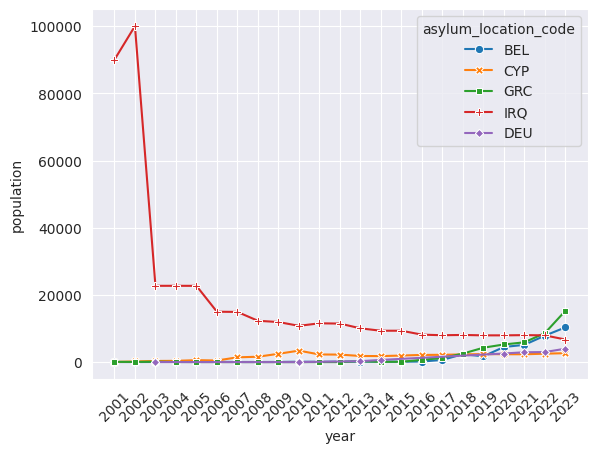

In [22]:
#lineplot showing year to year change of top 5 countries 2023
hcrYearCountry23_top5_line = sns.lineplot(data=hcrYearCountry23_top5, x = 'year', y = 'population', hue = 'asylum_location_code' , style = 'asylum_location_code', markers=True, dashes=False)
plt.xticks([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,2020, 2021, 2022, 2023])
plt.xticks(rotation = 45)
plt.show()
